<table>
    <tr>
        <td>
            <img src='https://cdn0.iconfinder.com/data/icons/isometric-city-basic-transport/48/car-front-01-128.png' style='display:inline' />
        </td>
        <td>
    <img src='http://rodrigob.github.io/are_we_there_yet/build/images/mnist.png?1363085077' width="100" />
        </td>
    </tr>
</table>

# LINCOLN DataScience Challenge #2
## CIFAR-10 - Image Recongnition

# Purpose
The goal of this notebook is to test the custom CNN implementation using the MNIST dataset.

Task done by the implementation:
- Scaling data
- Training a CNN using a softmax function / cross entropy loss
- Weight initialization : Xavier/Glorot
- Weight update using RMSprop

# Modules

In [1]:
from scipy.misc import imread, imsave, imresize, imshow, fromimage
import matplotlib.pyplot as plt
import numpy as np

# custom CNN implementation
from convNet.conv_net import conv_net
from convNet import imfunc as imf

# Loading training image and label

### Image

In [57]:
db = np.genfromtxt("MNIST/train.csv",delimiter=',',skip_header = 1)
Xtr = db[:,1:].reshape(42000,28,28,1)

### Label

In [28]:
Ytr = db[:,0].astype("uint8")

### Plotting some image

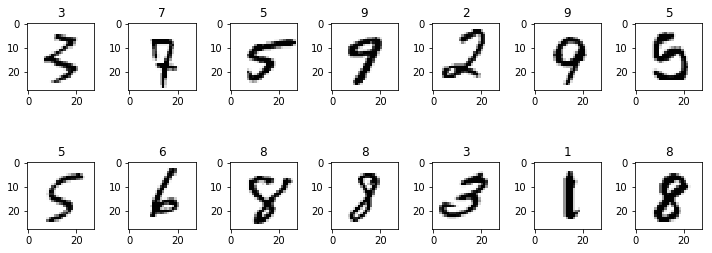

In [24]:
# number of image per row
n = 7
idx = np.random.choice(len(Ytr),size=n*2,replace=False)

# Initialization of plots - 2 row and n col
fig, axe = plt.subplots(2,n)

# Assigning image for each subplot
for i in range(n*2):
    axe[i//n,i%n].imshow(Xtr[idx[i]].reshape(28,28).astype("uint8"),cmap="Greys")
    axe[i//n,i%n].set_title(Ytr[idx[i]])

# Setting figure width and layout
fig.set_figwidth(10)
fig.tight_layout()
plt.show()

# Convolutional Neural Network - Training

### Train / test set

In [29]:
N = 40000 # size of training set

# Training set
Y = Ytr[:N]
X = Xtr[:N,]

# Test/validation set
Y_test = Ytr[N:N+2000]
X_test = Xtr[N:N+2000,]

### Neural Network initialisation

In [32]:
model = conv_net()

model.add_conv(0,1,3,64)
model.add_relu()
model.add_conv(0,1,3,64)
model.add_relu()
model.add_maxpool(2)
model.add_conv(0,1,3,32)
model.add_relu()
model.add_dropout(0.3)
model.add_conv(0,1,1,32)
model.add_relu()
model.add_dropout(0.5)
model.add_fully(10)

model.compile()

### Training

In [ ]:
model.train(train=(X,Y),
            test=(X_test,Y_test),
            b_size=100, # batch size
            l_rate=0.001, # learning rate
            n_epoch=20 # Epoch
            )

 ▄████▄   ▄▄▄       ██▀███     ▄▄▄█████▓▓█████ ▄▄▄       ███▄ ▄███▓
▒██▀ ▀█  ▒████▄    ▓██ ▒ ██▒   ▓  ██▒ ▓▒▓█   ▀▒████▄    ▓██▒▀█▀ ██▒
▒▓█    ▄ ▒██  ▀█▄  ▓██ ░▄█ ▒   ▒ ▓██░ ▒░▒███  ▒██  ▀█▄  ▓██    ▓██░
▒▓▓▄ ▄██▒░██▄▄▄▄██ ▒██▀▀█▄     ░ ▓██▓ ░ ▒▓█  ▄░██▄▄▄▄██ ▒██    ▒██ 
▒ ▓███▀ ░ ▓█   ▓██▒░██▓ ▒██▒     ▒██▒ ░ ░▒████▒▓█   ▓██▒▒██▒   ░██▒
░ ░▒ ▒  ░ ▒▒   ▓▒█░░ ▒▓ ░▒▓░     ▒ ░░   ░░ ▒░ ░▒▒   ▓▒█░░ ▒░   ░  ░
  ░  ▒     ▒   ▒▒ ░  ░▒ ░ ▒░       ░     ░ ░  ░ ▒   ▒▒ ░░  ░      ░
░          ░   ▒     ░░   ░      ░         ░    ░   ▒   ░      ░   
░ ░            ░  ░   ░                    ░  ░     ░  ░       ░   
░                                                                  
Epoch 0 - 010/400 ░░░░░░░░░░░░░░░░░░░░ acc: 37.7 loss: 1.87747419
Epoch 0 - 020/400 █░░░░░░░░░░░░░░░░░░░ acc: 68.6 loss: 1.021356
Epoch 0 - 030/400 █░░░░░░░░░░░░░░░░░░░ acc: 75.7 loss: 0.77650345
Epoch 0 - 040/400 ██░░░░░░░░░░░░░░░░░░ acc: 80.7 loss: 0.66784806
Epoch 0 - 050/400 ██░░░░░░░░░░░░░░░░░░ acc: 83.9 loss: 0.5

### Saving model

In [ ]:
imf.save_object(model, 'model_MNIST.pkl')
# For reloading saved model:
#model = imf.load_object('model_MNIST.pkl')

# Convolutional Neural Network - Results

### Plotting training process

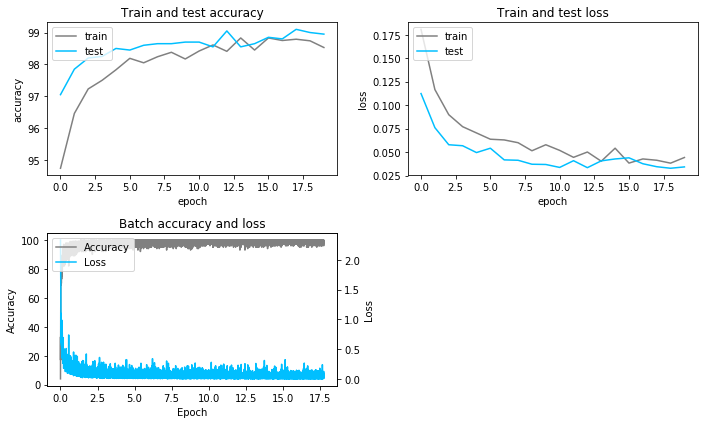

In [12]:
imf.plot_training(model)

### Accuracy

In [13]:
p,l,acc = model.predict(X_test,Y_test)
print('Test accuracy : %.2f %%' % acc)

Test accuracy : 98.95 %


### Plotting images we fail to predict

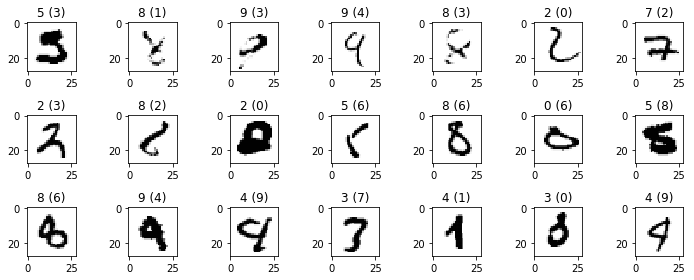

In [56]:
# number of image per row
n = 7
idx = np.where(np.argmax(p,axis=1)!=Y_test)[0]

row = idx.shape[0]//7 + (idx.shape[0]%7 > 0)

# Initialization of plots - 2 row and n col
fig, axe = plt.subplots(row,n)

# Assigning image for each subplot
for i in range(n*row):
    axe[i//n,i%n].imshow(X_test[idx[i]].reshape(28,28).astype("uint8"),cmap="Greys")
    axe[i//n,i%n].set_title(str(Y_test[idx[i]]) + " (" + str(np.argmax(p,axis=1)[idx[i]]) + ')')

# Setting figure width and layout
fig.set_figwidth(10)
fig.tight_layout()
plt.show()